In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import datasets
%matplotlib inline
from patsy import dmatrices
from sklearn import linear_model
from sklearn import ensemble
import statsmodels
import statsmodels.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [15]:
salaryofboston= pd.read_csv('https://data.boston.gov/dataset/418983dc-7cae-42bb-88e4-d56f5adcf869/resource/70129b87-bd4e-49bb-aa09-77644da73503/download/employee-earnings-report-2017.csv')
print (salaryofboston)
#introducd:The dataset that I have chosen is the employee earnings report from Boston government website. It contains a lot of information, like the department of each stuff, the title of them, the regular earnings of them, and some other income, like injury, detail, Retro, other things. And we can also use the sort function to arrange the dataset by a certain part of it.

#I think this dataset is quite interesting because we can find a lot of information in it. we can know the average earnings for the different apartment, and like which apartment has the highest salary. This dataset shows us many things that we cannot approach in the past, and different from the dataset from weather report or financial report, these data have more connection with us, like most of our tax are used to the salary of the stuff. To find out what our tax used to do is really interesting for me. That is why I choose this dataset.



                           NAME                DEPARTMENT NAME  \
0              Miller,Francis T       Boston Police Department   
1       Sullivan,Patrice Murphy       Boston Police Department   
2              O'Hara,Michael C       Boston Police Department   
3              Whalen,Richard L       Boston Police Department   
4               Kelly,Ann Marie       Boston Police Department   
5             Carroll,William F       Boston Police Department   
6               Connolly,John J       Boston Police Department   
7                  Ivens,Paul M       Boston Police Department   
8                  Kelly,John R       Boston Police Department   
9               Klokman,John A.       Boston Police Department   
10                Newton,Robert       Boston Police Department   
11          Peters,Kenneth A Jr       Boston Police Department   
12           Rodriguez,Carmen N       Boston Police Department   
13             Hartgrove,Todd M       Boston Police Department   
14        

In [16]:
#1 clean the data
#find the duplicated data and drop it.
salaryofboston.duplicated()
salaryofboston.drop_duplicates()

,NAME,DEPARTMENT NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,"Miller,Francis T",Boston Police Department,Police Lieutenant (Det),"$129,530.83",NaN,"$13,694.50","$8,150.41",NaN,NaN,"$24,286.86","$175,662.60",2043
1,"Sullivan,Patrice Murphy",Boston Police Department,Office Manager,"$56,921.80",NaN,"$3,594.65","$1,548.16",NaN,NaN,NaN,"$62,064.61",2132
2,"O'Hara,Michael C",Boston Police Department,Police Lieutenant,"$124,056.64",NaN,"$6,432.23","$29,043.67",NaN,"$22,385.00","$23,260.69","$205,178.23",2021
3,"Whalen,Richard L",Boston Police Department,Police Detective,"$94,956.25","$4,985.32","$13,591.93","$85,419.22",$58.03,"$16,330.00","$19,971.01","$235,311.76",2062
4,"Kelly,Ann Marie",Boston Police Department,Tape Librarian I (BPD),"$69,995.34",NaN,$300.00,"$7,961.08",NaN,NaN,NaN,"$78,256.42",2190
5,"Carroll,William F",Boston Police Department,Police Offc/Hosp Liaison 4$10,"$12,756.79","$2,390.14","$41,612.10",$912.04,NaN,NaN,"$1,563.30","$59,234.37",2131
6,"Connolly,John J",Boston Police Department,Police Officer,"$93,180.42","$2,027.71","$13,338.20","$19,881.93",NaN,"$28,934.00","$14,733.53","$172,095.79",2339
7,"Ivens,Paul M",Boston Police Department,Police Captain/DDC,NaN,NaN,"$60,777.01",NaN,"$2,658.71",NaN,$498.51,"$63,934.23",2339
8,"Kelly,John R",Boston Police Department,Police Sergeant (Det),"$13,827.39",NaN,"$62,393.08",$867.60,NaN,NaN,"$2,074.11","$79,162.18",2492
9,"Klokman,John A.",Boston Police Department,PoliceSergeant/SupvCourtCases,"$107,599.31",NaN,"$14,482.47","$12,824.85",NaN,"$99,640.00","$16,140.15","$250,686.78",2134


In [26]:
#find the missing data
salaryofboston.isnull()
#if the value is missing, than presented as True.
salaryofboston.notnull()
#if the value is missing, than presented as False.
salaryofboston['INJURED']=salaryofboston['INJURED'].fillna(0)
#change the missing value in RETRO into 0
salaryofboston.rename(columns={'TITLE':'RENAMETITLE'}, inplace = True)
#change the name of colomn.
Bostonpolicedepartment = salaryofboston['DEPARTMENT NAME']=='Boston Police Department'
#selecting subset of relevant columns
#because in the third question, if I use the TOTAL EARNINGS as one of my variables, it always shows invalid syntax.
#so I change the name of it into TOTAL_earnings(but I have changed it once, so in the code of rename, the first is TOTAL)
salaryofboston.rename(columns={'TOTAL EARNINGS':'TOTAL_earnings'}, inplace = True)
print (salaryofboston)

                           NAME                DEPARTMENT NAME  \
0              Miller,Francis T       Boston Police Department   
1       Sullivan,Patrice Murphy       Boston Police Department   
2              O'Hara,Michael C       Boston Police Department   
3              Whalen,Richard L       Boston Police Department   
4               Kelly,Ann Marie       Boston Police Department   
5             Carroll,William F       Boston Police Department   
6               Connolly,John J       Boston Police Department   
7                  Ivens,Paul M       Boston Police Department   
8                  Kelly,John R       Boston Police Department   
9               Klokman,John A.       Boston Police Department   
10                Newton,Robert       Boston Police Department   
11          Peters,Kenneth A Jr       Boston Police Department   
12           Rodriguez,Carmen N       Boston Police Department   
13             Hartgrove,Todd M       Boston Police Department   
14        

/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

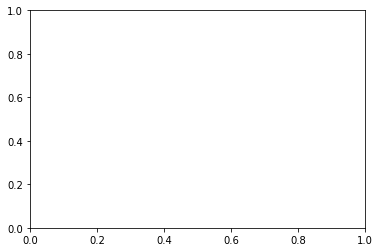

In [55]:
#2.DATA VISUALIZATION
% matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
#histogram of regular earnings. 
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(salaryofboston['REGULAR'],bins=100)
plt.title=('regular earnings distribution')
plt.xlabel=('regular earnings')
plt.ylabel=('stuff')
plt.show()
#analysis: because this value is ranged as the department name, thus we can know that the department of boston police
#department has the highest annual regular earnings, and the BRS has the lowest annual regular earnings. 


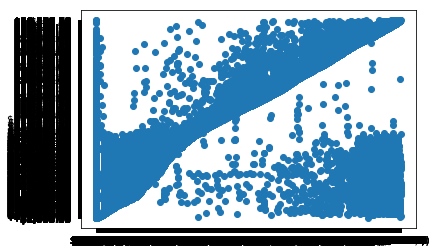

In [20]:
#scatter chart of regular earnings.
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(salaryofboston['REGULAR'],salaryofboston['TOTAL_earnings'])
plt.show()
# I can not get any information from this chart





In [52]:
#question 3

# clean the data
#find the duplicated data and drop it.replace the missing data and drop the special char.
salaryofboston['REGULAR'] = salaryofboston['REGULAR'].str.replace('$', '')
salaryofboston['REGULAR'] = salaryofboston['REGULAR'].str.replace(',', '')
salaryofboston['REGULAR'] = salaryofboston['REGULAR'].str.replace('(', '')
salaryofboston['REGULAR'] = salaryofboston['REGULAR'].str.replace(')', '')
salaryofboston['TOTAL_earnings'] = salaryofboston['TOTAL_earnings'].str.replace('$', '')
salaryofboston['TOTAL_earnings'] = salaryofboston['TOTAL_earnings'].str.replace(',', '')
salaryofboston['TOTAL_earnings'] = salaryofboston['TOTAL_earnings'].str.replace('(', '')
salaryofboston['TOTAL_earnings'] = salaryofboston['TOTAL_earnings'].str.replace(')', '')
salaryofboston['REGULAR'] = salaryofboston['REGULAR'].astype(float)
salaryofboston['TOTAL_earnings'] = salaryofboston['TOTAL_earnings'].astype(float)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [54]:
#question 3
#(1)hypothesis: I am wondering that the REGULAR EARNINGS occupied more than 80% of each stuff's TOTAL EARNINGS.
salaryofboston['result'] = (salaryofboston['REGULAR']/salaryofboston['TOTAL_earnings']  > 0.8).astype(np.float32)
print(salaryofboston['result'].mean())
model = sklearn.linear_model.LogisticRegression()
y,X = dmatrices('result ~ TOTAL_earnings', data=salaryofboston)
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))
#analysis:it is like 80% of the data fit our hypothesis, which means our alternative hypothesis is right.

0.8124072551727295
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00      4173
        1.0       0.81      1.00      0.90     18072

avg / total       0.66      0.81      0.73     22245



/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
(2)from patsy import dmatrices
y,X = dmatrices('REGULAR ~ TOTAL_earnings', data=salaryofboston, return_type='dataframe')
print("X:", type(X))
print(X.columns)
model=smf.OLS(y, X)
result=model.fit()
result.summary()
#it is a descriptive statistics from statistics model.
#we can observe that R-squared is 0.776 which means the REGULAR and TOTAL EARNINGS have strong relationship.
#

X: <class 'pandas.core.frame.DataFrame'>
Index(['Intercept', 'TOTAL_earnings'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                REGULAR   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                 7.488e+04
Date:                Sun, 01 Apr 2018   Prob (F-statistic):               0.00
Time:                        08:35:12   Log-Likelihood:            -2.4235e+05
No. Observations:               21640   AIC:                         4.847e+05
Df Residuals:                   21638   BIC:                         4.847e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.454e+04    209.242     69.508      0.000    1.41e+04     1.5e+04
TOTAL_earnings     0.6447      0.002    273.639      0.000       0.640       0.649
==============================================================================
Omnibus:                     6485.662   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28170.401
Skew:                          -1.415   Prob(JB):                         0.00
Kurtosis:                       7.820   Cond. No.                     1.55e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
#(3)
y,X = dmatrices('REGULAR ~ TOTAL_earnings', data=salaryofboston)
print("y:{}".format(y.shape))
print("X:{}".format(X.shape))
from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept=False)
res = model.fit(X, y)



y:(21640, 1)
X:(21640, 2)


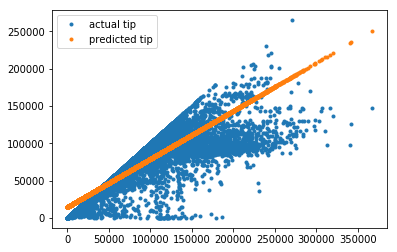

In [44]:
plt.plot(X[:,1], y, '.')
plt.plot(X[:,1], model.predict(X), '.')
plt.legend(['actual tip', 'predicted tip'])


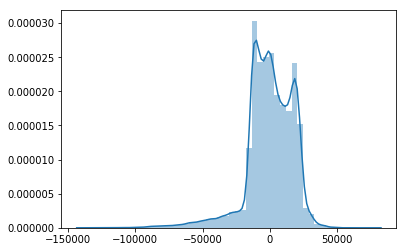

In [45]:
sns.distplot(y - model.predict(X))

In [46]:
model.coef_


array([[1.45440147e+04, 6.44679426e-01]])

In [48]:

from sklearn import ensemble
model = sklearn.ensemble.RandomForestRegressor()
model.fit(X,y)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

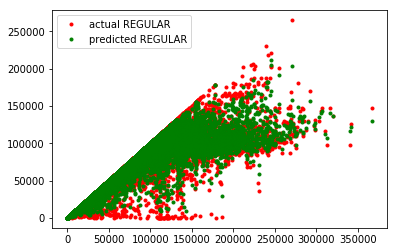

In [49]:
plt.plot(X[:,1], y, 'r.')
plt.plot(X[:,1], model.predict(X), 'g.')
plt.legend(['actual REGULAR', 'predicted REGULAR'])

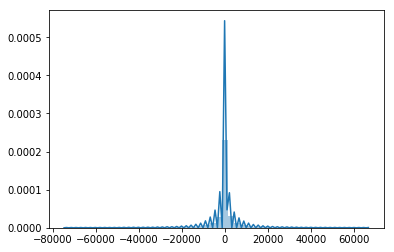

In [50]:
sns.distplot(y.ravel() - model.predict(X))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


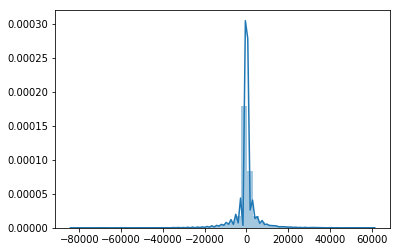

In [51]:
y,X = dmatrices('REGULAR~TOTAL_earnings', data=salaryofboston)
model = sklearn.ensemble.RandomForestRegressor()
model.fit(X,y)
sns.distplot(y.ravel() - model.predict(X))